# Explore Weather Trends

In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

In [11]:
# read dataset
tokyo_df = pd.read_csv('dataset/results_tokyo.csv')
global_df = pd.read_csv('dataset/results_global.csv')

In [12]:
tokyo_df.head()

,year,city,country,avg_temp
0,1845,Tokyo,Japan,11.95
1,1846,Tokyo,Japan,12.40
2,1847,Tokyo,Japan,12.21
3,1848,Tokyo,Japan,12.14
4,1849,Tokyo,Japan,12.14


In [13]:
tokyo_df.describe()

,year,avg_temp
count,169.000000,169.000000
mean,1929.000000,12.565740
std,48.930222,0.649692
min,1845.000000,11.180000
25%,1887.000000,12.140000
50%,1929.000000,12.450000
75%,1971.000000,12.920000
max,2013.000000,16.120000


In [14]:
global_df.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


In [15]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [16]:
# calculate moving average
window_size = 10
tokyo_df['mva_temp'] = tokyo_df['avg_temp'].rolling(window=window_size).mean()
global_df['mva_temp'] = global_df['avg_temp'].rolling(window=window_size).mean()

In [17]:
tokyo_df.head(30)

,year,city,country,avg_temp,mva_temp
0,1845,Tokyo,Japan,11.95,NaN
1,1846,Tokyo,Japan,12.40,NaN
2,1847,Tokyo,Japan,12.21,NaN
3,1848,Tokyo,Japan,12.14,NaN
4,1849,Tokyo,Japan,12.14,NaN
5,1850,Tokyo,Japan,11.71,NaN
6,1851,Tokyo,Japan,11.76,NaN
7,1852,Tokyo,Japan,11.73,NaN
8,1853,Tokyo,Japan,11.86,NaN
9,1854,Tokyo,Japan,12.24,12.014


# Plot

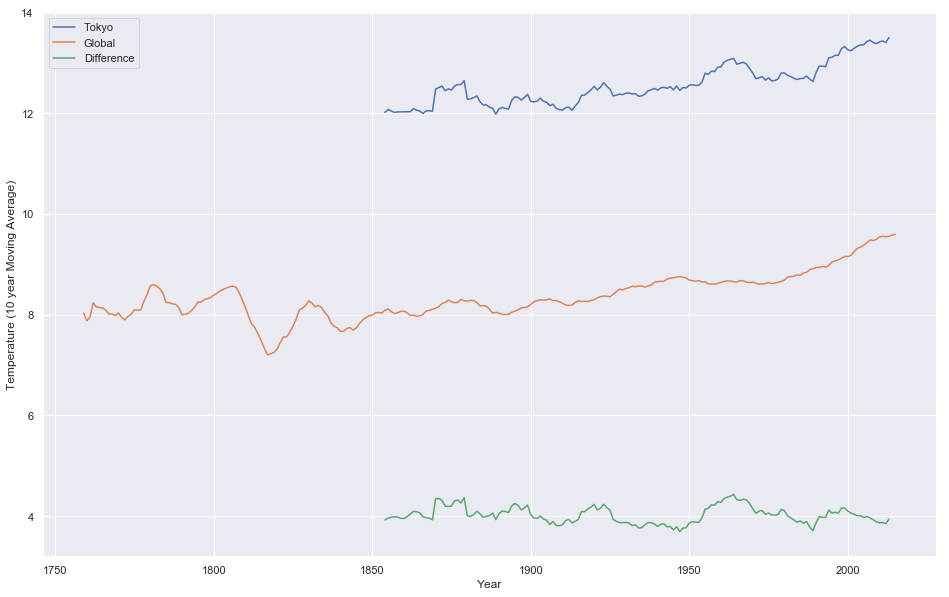

In [18]:
# plot the results
tokyo_year = tokyo_df.year.values[window_size - 2:]
tokyo_temp = tokyo_df.mva_temp.values[window_size - 2:]
global_year = global_df.year.values[window_size - 2:]
global_temp = global_df.mva_temp.values[window_size - 2:]

# calculate the difference
tokyo_year_min = np.min(tokyo_year)
tokyo_year_max = np.max(tokyo_year)
idx = np.where((global_year >= tokyo_year_min) & (global_year <= tokyo_year_max))
diff = tokyo_temp - global_temp[idx]

plt.plot(tokyo_year, tokyo_temp, label='Tokyo')
plt.plot(global_year, global_temp, label='Global')
plt.plot(tokyo_year, diff, label='Difference')
plt.xlabel('Year')
plt.ylabel('Temperature (10 year Moving Average)')
plt.legend()
plt.show()

# Observations
#### Is your city hotter or cooler on average compared to the global average?
My city (Tokyo) is hotter than the global average.

#### Has the difference been consistent over time?
The difference (green line) seems consistent over time.

#### What does the overall trend look like?
The overall trends are similar.

#### Is the world getting hotter or cooler?
Yes, it is. Tokyo is also getting hotter.

# Outline

#### What tools did you use for each step? (Python, SQL, Excel, etc)
- SQL to extract data
- Pandas to calculate the moving average
- Matplotlib to plot the results

#### How did you calculate the moving average?
I used Pandas' function.

#### What were your key considerations when deciding how to visualize the trends?
I plot the results so that it's easy to compare the differences and trends.

#### SQL Commands I used to extract data
- select * from city_data where city='Tokyo
- select * from global_data<br>